In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
)

In [12]:
df = pd.read_csv(r"D:\Project DS Final\Data\classi_mod_data.csv")
print(df.shape)
df.head(5)

(79706, 16)


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyVisibility,HourlyWindSpeed,DEP_DEL15
0,4,1,2,0,1,62,-1.371023,-1.053675,-0.190881,-0.222270,-1.469068,-2.530912,1.697315,0.191082,0.447885,0.0
1,4,1,2,0,1,62,0.322520,0.511390,-0.285164,-0.222270,-1.469068,-1.567803,0.295272,0.191082,0.447885,1.0
2,4,1,2,0,4,14,-1.219136,0.012848,1.353008,1.492567,-0.874567,-1.781828,1.211992,0.191082,-0.588815,0.0
3,4,1,2,0,4,14,0.014948,1.171957,1.364794,1.492567,-0.280067,-1.139755,0.888444,0.191082,-0.588815,0.0
4,4,1,2,0,4,14,1.566096,-1.646583,1.364794,1.492567,-0.280067,-1.567803,1.535541,0.191082,-0.329640,0.0


In [13]:
X = df.drop("DEP_DEL15", axis=1)
y = df["DEP_DEL15"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Class distribution in train:\n", y_train.value_counts(normalize=True))

Train shape: (63764, 15)  Test shape: (15942, 15)
Class distribution in train:
 DEP_DEL15
1.0    0.501286
0.0    0.498714
Name: proportion, dtype: float64


In [14]:
model = RandomForestClassifier(
    n_estimators=200,       
    max_depth=20,           
    min_samples_split=2,    
    min_samples_leaf=1,    
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [15]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")

Accuracy:  0.8464
Precision: 0.8412
Recall:    0.8502
F1-score:  0.8457


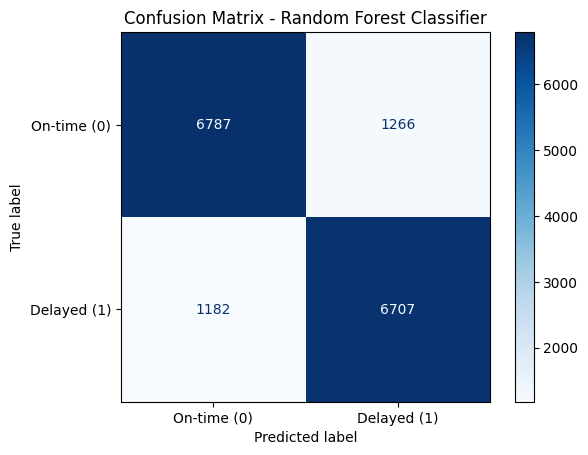

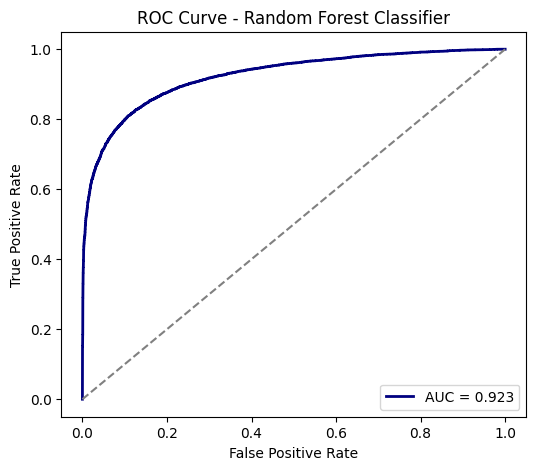

In [16]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['On-time (0)', 'Delayed (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_7696\2451275963.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(15), y=importances.head(15).index, palette="Blues_r")


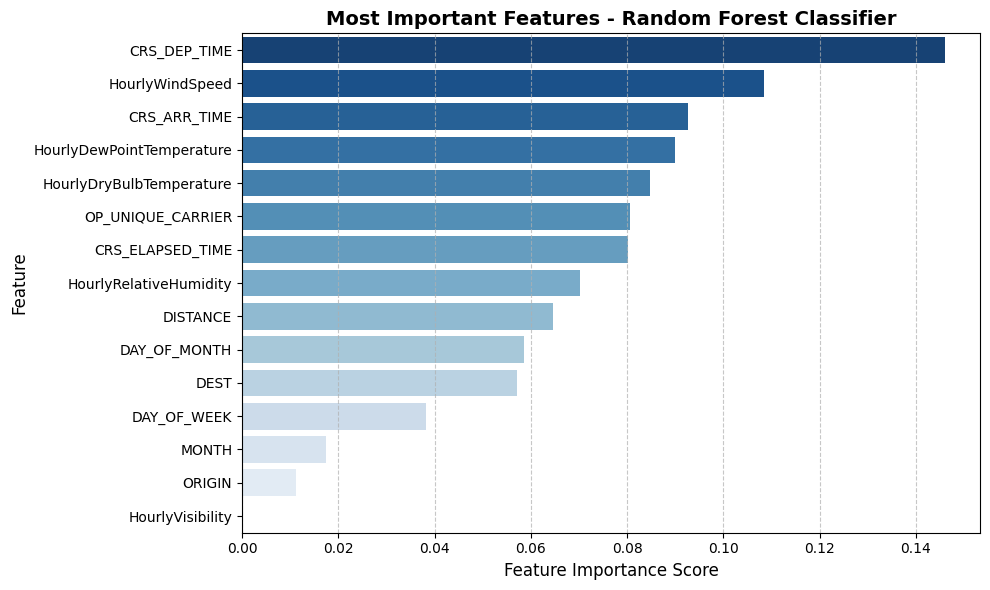

In [17]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances.head(15), y=importances.head(15).index, palette="Blues_r")
plt.title("Most Important Features - Random Forest Classifier", fontsize=14, fontweight="bold")
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()